# 02 Seminar: Prompt Engineering, LangChain and LlamaIndex

In [ ]:
!pip install --upgrade --quiet gigachain==0.2.6 gigachain_community==0.2.6 gigachain-cli==0.0.25 duckduckgo-search==6.2.4 pyfiglet==1.0.2 langchain-anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.6/91.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.0/894.0 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.7/403.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.

## Brief Summary

* **Prompt engineering** is the art and science of crafting effective prompts to get the best results from LLMs. It involves designing and refining input instructions to guide AI models in generating more accurate, relevant, and useful responses. This field is crucial for optimizing AI performance across various applications.

* **LangChain** is an open-source framework designed to simplify the development of applications using LLMs. It provides a set of tools and components that allow developers to easily chain together different LLM operations, integrate external data sources, and create more complex, context-aware AI applications. LangChain is particularly useful for building chatbots, question-answering systems, and other AI-powered tools.

* **LlamaIndex** is a data framework for building LLM applications. It focuses on helping developers connect custom data sources to large language models, enabling more personalized and data-driven AI applications. LlamaIndex provides tools for data ingestion, structuring, and querying, making it easier to create AI systems that can leverage both general knowledge and specific, user-provided information.

## Part 1: Introduction to Prompt Engineering

In [ ]:
import os
import getpass
import requests
import json

In [ ]:
def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = os.getenv(var)

_set_if_undefined("GIGACHAT_CREDENTIALS")
_set_if_undefined("GPT_TUNNEL_KEY")
_set_if_undefined("HF_API_TOKEN")
_set_if_undefined("TMDB_API_KEY")

TypeError: str expected, not NoneType

In [ ]:
from langchain.chat_models.gigachat import GigaChat

In [ ]:
giga_key = os.environ.get("GIGACHAT_CREDENTIALS")

giga = GigaChat(credentials=giga_key,
                model="GigaChat", timeout=30, verify_ssl_certs=False)
giga.verbose = False

In [ ]:
from langchain.schema import HumanMessage, SystemMessage

In [ ]:
messages = [
    SystemMessage(
        content="You are an empathic bot psychologist who helps the user solve their problems."
    )
]

# User Input
user_input = input("User: ")
messages.append(HumanMessage(content=user_input))
res = giga(messages)
messages.append(res)
# Model Answer
print("Bot: ", res.content)

User: Hi!


<ipython-input-7-722141359d5c>:10: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  res = giga(messages)


Bot:  Hello! I'm here to help you with anything you need. How can I assist you today?


**Classic Prompt**: Directly asks the question without any additional reasoning or context.

**Chain of Thought (CoT)**: Breaks down the problem into logical steps, providing a clear reasoning path to the answer.

**Zero-shot-CoT**: Similar to CoT but assumes no prior examples are given. It guides the model to think step-by-step from scratch.

**Few-Shot Learning**: Provides examples of similar problems and their solutions before asking the target question, helping the model learn from patterns.

**Self-Consistency (SC)**: Evaluates the problem multiple times to ensure the answer is consistent across different evaluations.

**Chain of Event (CoE)**: Focuses on a sequence of events or steps leading to the conclusion, highlighting the process rather than just the reasoning.

**Classic Prompt**: Directly asks the question without any additional reasoning or context.

In [ ]:
# Classic Prompt
classic_prompt = """
Which number is larger: 9.8 or 9.12?
"""

response = giga.invoke([HumanMessage(content=classic_prompt)])
print(f"Prompt:\n{classic_prompt}\n\nModel answer:\n{response.content}\n")

Prompt:

Which number is larger: 9.8 or 9.12?


Model answer:
The number that is larger is 9.8.



**Chain of Thought (CoT)**: Breaks down the problem into logical steps, providing a clear reasoning path to the answer.

In [ ]:
# Chain of Thought (CoT)
cot_prompt = """
Which number is larger: 5.23 or 5.16?
1) compare whole number 5 is equal to 5
2) compare decimal 23 is greater than 16
3) write an answer 5.23

So, 5.23 is the larger number.

Which number is larger: 9.8 or 9.12?
"""

response = giga.invoke([HumanMessage(content=cot_prompt)])
print(f"Prompt:\n{cot_prompt}\n\nModel answer:\n{response.content}\n")

Prompt:

Which number is larger: 5.23 or 5.16?
1) compare whole number 5 is equal to 5
2) compare decimal 23 is greater than 16
3) write an answer 5.23

So, 5.23 is the larger number.

Which number is larger: 9.8 or 9.12?


Model answer:
1) Compare whole numbers: 9 is greater than 8
2) Compare decimals: 12 is greater than 10
3) Write an answer: 9.12



**Zero-shot-CoT**: Similar to CoT but assumes no prior examples are given. It guides the model to think step-by-step from scratch.

In [ ]:
# Zero-shot-CoT
zero_shot_cot_prompt = """
Which number is larger: 9.8 or 9.12?
Let's think step by step.
"""

response = giga.invoke([HumanMessage(content=zero_shot_cot_prompt)])
print(f"Prompt:\n{zero_shot_cot_prompt}\n\nModel answer:\n{response.content}\n")

Prompt:

Which number is larger: 9.8 or 9.12?
Let's think step by step.


Model answer:
First, we need to convert both numbers from decimal form to a common base. Since both numbers are in the decimal system, we can convert them to the base-ten system.

For 9.8, we have:
9 * 10 + 8 = 98

For 9.12, we have:
9 * 10 + 12/10 = 98

Now that we have both numbers expressed as whole numbers, we can compare them:
98 > 98

So, the number 9.8 is larger than 9.12.



**Few-Shot Learning**: Provides examples of similar problems and their solutions before asking the target question, helping the model learn from patterns.

In [ ]:
# Few-Shot Learning
few_shot_prompt = """
Example 1: Which is larger, 3.5 or 3.7?
- Compare whole numbers: both are 3.
- Compare decimals: 5 is less than 7.
- Answer: 3.7 is larger.

Example 2: Which is larger, 2.19 or 2.4?
- Compare whole numbers: both are 2.
- Compare decimals: we need same numbers, so .19 and .40: 40 is greter than 19
- Answer: 2.4 is larger.

Which number is larger: 9.8 or 9.12?
"""

response = giga.invoke([HumanMessage(content=few_shot_prompt)])
print(f"Prompt:\n{few_shot_prompt}\n\nModel answer:\n{response.content}\n")

Prompt:

Example 1: Which is larger, 3.5 or 3.7?
- Compare whole numbers: both are 3.
- Compare decimals: 5 is less than 7.
- Answer: 3.7 is larger.

Example 2: Which is larger, 2.19 or 2.4?
- Compare whole numbers: both are 2.
- Compare decimals: we need same numbers, so .19 and .40: 40 is greter than 19
- Answer: 2.4 is larger.

Which number is larger: 9.8 or 9.12?


Model answer:
- Compare whole numbers: both are 9.
- Compare decimals: 8 is greater than 12.
- Answer: 9.8 is larger.



**Self-Consistency (SC)**: Evaluates the problem multiple times to ensure the answer is consistent across different evaluations.

In [ ]:
# Self-Consistency (SC)
self_consistency_prompt = """
Which is larger, 2.19 or 2.4?
To ensure consistency, let's evaluate this multiple times.
First evaluation: Compare whole numbers, both are 2. Compare decimals, 19 is less than 40. Result: 2.4 is larger.
Second evaluation: Whole numbers are equal. Go to same quantity of numbers: 2.19 and 2.40. Decimals show 19 is less than 40. Result: 2.4 is larger.
Third evaluation: Same whole numbers, decimals indicate 19 < 40. Result: 2.4 is larger.

Which number is larger: 9.8 or 9.12?
"""

response = giga.invoke([HumanMessage(content=self_consistency_prompt)])
print(f"Prompt:\n{self_consistency_prompt}\n\nModel answer:\n{response.content}\n")

Prompt:

Which is larger, 2.19 or 2.4?
To ensure consistency, let's evaluate this multiple times.
First evaluation: Compare whole numbers, both are 2. Compare decimals, 19 is less than 40. Result: 2.4 is larger.
Second evaluation: Whole numbers are equal. Go to same quantity of numbers: 2.19 and 2.40. Decimals show 19 is less than 40. Result: 2.4 is larger.
Third evaluation: Same whole numbers, decimals indicate 19 < 40. Result: 2.4 is larger.

Which number is larger: 9.8 or 9.12?


Model answer:
First evaluation: Compare whole numbers, both are 9. Compare decimals, 8 is greater than 12. Result: 9.8 is larger.



**Chain of Event (CoE)**: Focuses on a sequence of events or steps leading to the conclusion, highlighting the process rather than just the reasoning.

In [ ]:
# Chain of Event (CoE) https://www.emerald.com/insight/content/doi/10.1108/IJWIS-12-2023-0249/full/html
coe_prompt = """
To determine which number is larger, follow these events:
1. Identify the whole number part of both numbers
3. Compare the decimal digits with the same number of digits
5. Conclude comparison

Which number is larger: 9.8 or 9.12?
"""

response = giga.invoke([HumanMessage(content=coe_prompt)])
print(f"Prompt:\n{coe_prompt}\n\nModel answer:\n{response.content}\n")

Prompt:

To determine which number is larger, follow these events:
1. Identify the whole number part of both numbers
3. Compare the decimal digits with the same number of digits
5. Conclude comparison

Which number is larger: 9.8 or 9.12?


Model answer:
To determine which number is larger, we will follow the given steps:

1. Identify the whole number part of both numbers:
   - 9 for 9.8
   - 9 for 9.12

2. Compare the decimal digits with the same number of digits:
   - 8 > 12

3. Conclude comparison:
   9.8 is larger than 9.12.



## Part 2: Using LangChain to work with different Models

A few words about the differences between LlamaIndex and Langchain:

**LangChain**


* Primary focus: Building and connecting various components of LLM applications.
* Scope: Broader, covering multiple aspects of LLM app development.
* Key features: Chains, agents, memory systems, and prompt templates.
* Data handling: Offers various data loaders but not specialized in data indexing.
* Use case: General-purpose framework for diverse LLM applications.

**LlamaIndex**

* Primary focus: Connecting external data to LLMs efficiently.
* Scope: More specialized in data ingestion and retrieval for LLMs.
* Key features: Advanced indexing structures, query engines, and data connectors.
* Data handling: Specialized in creating and managing indexes for efficient data retrieval.
* Use case: Ideal for applications requiring integration of large, custom datasets with LLMs.

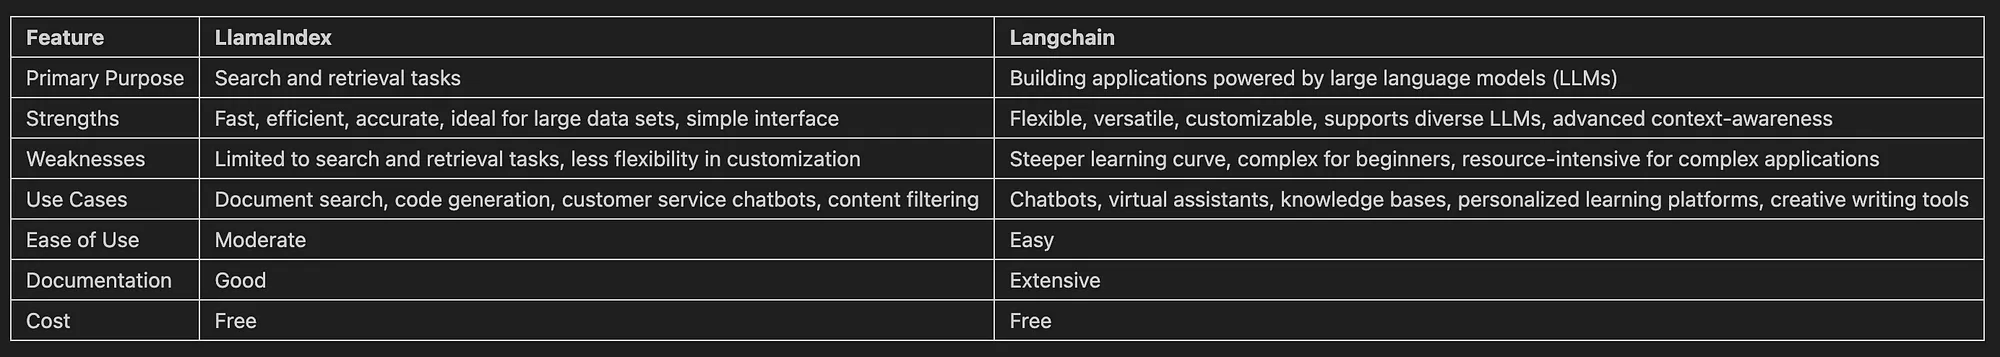

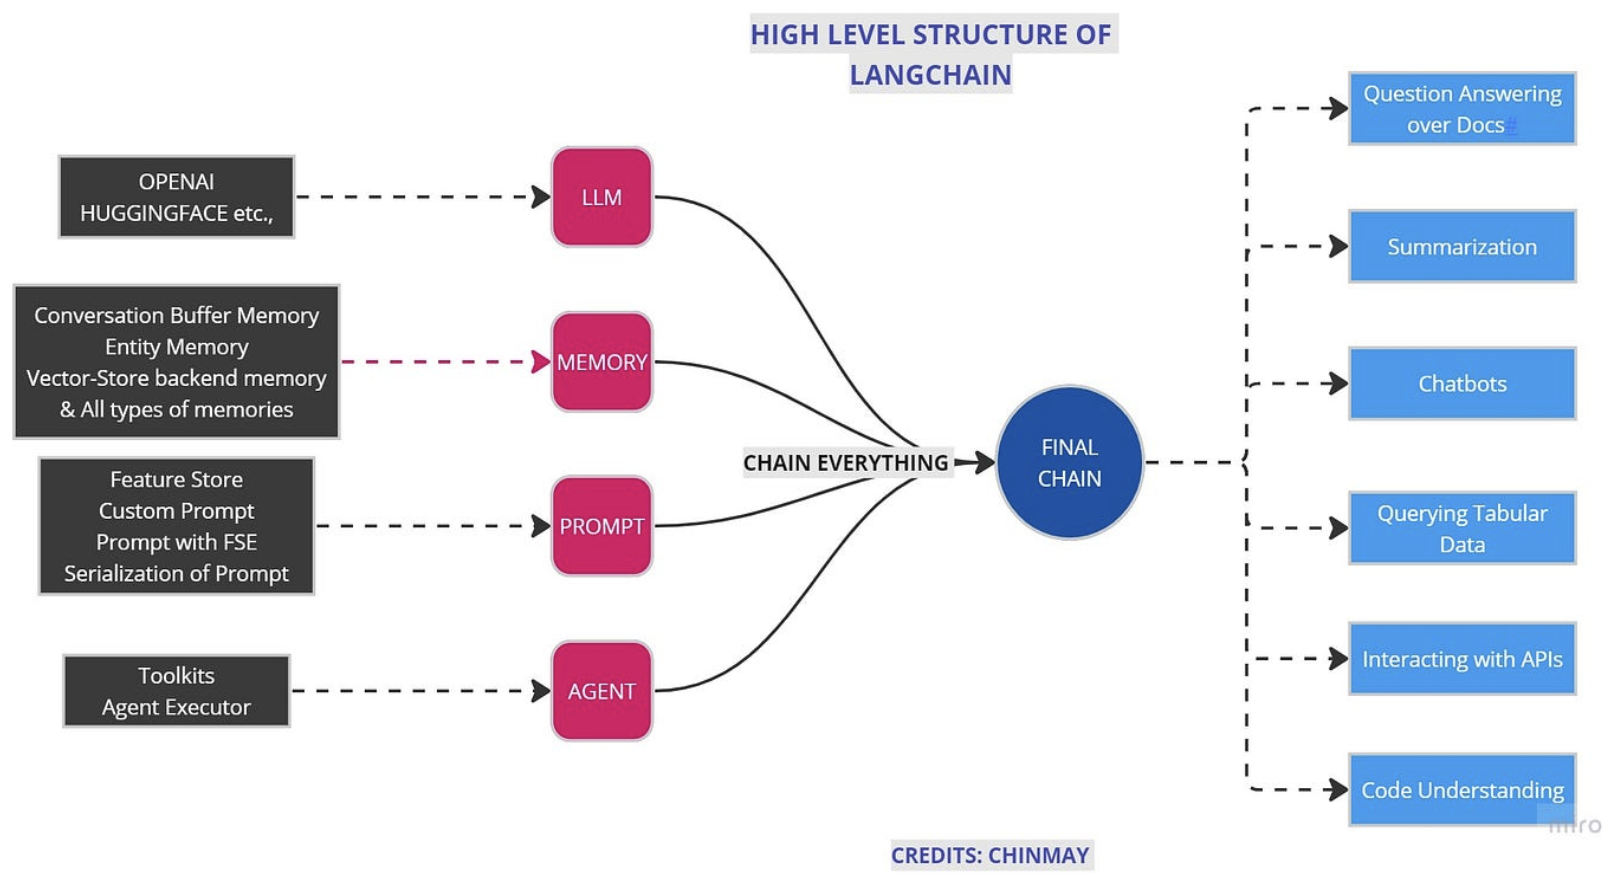

Some links 😇

* [LangChain Intro](https://python.langchain.com/docs/introduction/)

* [LangChain CookBook with MANY examples in Jupyter](https://github.com/langchain-ai/langchain/blob/master/cookbook/README.md)

* [LangChain How-to-guides](https://python.langchain.com/docs/how_to/#components)

* [LlamaIndex](https://docs.llamaindex.ai/en/stable/)

In [ ]:
def get_chat_completion(prompt, model="gpt-4o"):
    url = "https://gptunnel.ru/v1/chat/completions"
    api_key = os.environ.get("GPT_TUNNEL_KEY")

    if not api_key:
        raise ValueError("API key not found. Please set the GPT_TUNNEL_KEY environment variable.")

    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }
    data = {
        "model": model,
        "messages": [
            {
                "role": "user",
                "content": prompt
            }
        ]
    }

    response = requests.post(url, headers=headers, data=json.dumps(data))

    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Request failed with status code {response.status_code}: {response.text}")

In [ ]:
giga_pro = GigaChat(credentials=giga_key, model="GigaChat-Pro", timeout=30, verify_ssl_certs=False)

Let's compare the responses of different models

In [ ]:
models = {
    "GigaChat": giga,
    "GigaChat-Pro": giga_pro,
}

prompt = "Explain quantum entanglement in simple words"

for model_name, model in models.items():
    response = model([HumanMessage(content=prompt)])
    print(f"{model_name}:\n{response.content}\n{'='*50}\n")

response = get_chat_completion(prompt, model='gpt-4o')
print(f"gpt-4o:\n{response['choices'][0]['message']['content']}\n{'='*50}\n")

GigaChat:
Quantum entanglement is a phenomenon where two or more particles are so closely connected that they behave as if they share the same state of existence. This connection can be established even when the particles are separated by large distances.

GigaChat-Pro:
Квантовая запутанность — это явление, при котором две частицы ведут себя как единое целое, даже если они находятся на большом расстоянии друг от друга. Если что-то происходит с одной частицей (например, она меняет своё направление), то одновременно меняется и состояние другой частицы, независимо от того, где она находится. Это одно из самых загадочных явлений квантовой механики, которое не имеет аналогов в классической физике.

gpt-4o:
Quantum entanglement is a phenomenon in which two or more particles become interconnected in such a way that the state of one particle instantly influences the state of the other(s), no matter how far apart they are. Imagine it like having a pair of magic dice: if you roll one die and it 

In [ ]:
from langchain_community.llms import HuggingFaceHub

In [ ]:
hf_api_key = os.environ.get("HF_API_TOKEN")

gpt2_model = HuggingFaceHub(repo_id='gpt2', model_kwargs={"temperature": 0.4}, huggingfacehub_api_token=hf_api_key)

def generate_text_hf(prompt):
    response = gpt2_model(prompt)
    return response

prompt = "Explain quantum entanglement in simple words"
response_gpt2 = generate_text_hf(prompt)
print(response_gpt2)

<ipython-input-50-d1ceefb1e277>:4: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEndpoint`.
  gpt2_model = HuggingFaceHub(repo_id='gpt2', model_kwargs={"temperature": 0.4}, huggingfacehub_api_token=hf_api_key)
<ipython-input-50-d1ceefb1e277>:8: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  response = gpt2_model(prompt)


Explain quantum entanglement in simple words.

The idea is that the probability of a particle's existence depends on its properties. For example, if a particle is a particle of the form, say, a quark, and the probability ofouched is equal to the probability of the existence of a quark, then the probability of the existence of a quark is equal to the probability of the existence of a quark. If the probability of the existence of a quark is equal to the probability of the existence of a qu


## Part 3: Implementing Chain-of-Thought using LangChain

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

### PromptTemplate

This is a component that allows you to create templates for queries to language models. It helps to structure queries by specifying the format and parameters that should be passed to the model.

See more prompt templates [in docs](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/)



In [ ]:
cot_template = """
Task: {question}

Think step by step (Chain-of-Thought):
1) ...
2) ...
3) ...
...

"""

cot_prompt = PromptTemplate(
    input_variables=["question"],
    template=cot_template
)

cot_chain = LLMChain(llm=giga, prompt=cot_prompt)

question_list = [
    "How much will it be 15 * 7 + 22 ?",
    "You have to help me - how to become a Senior ML Engineer?",
    "Which is heavier - a kilogram of fluff or a kilogram of iron?"
    ]

for question in question_list:
    result = cot_chain.run(question=question)
    print(f"\n{'='*50}\nQuestion: {question}\n\nThe answer using Chain-of-Thought:\n{result}")


Question: How much will it be 15 * 7 + 22 ?

The answer using Chain-of-Thought:
To solve this problem, we need to follow these steps:

1) Calculate the product of 15 and 7: 15 * 7 = 105
2) Add the number 22 to the result from step 1: 105 + 22 = 127

So, the answer is 127.

Question: You have to help me - how to become a Senior ML Engineer?

The answer using Chain-of-Thought:
To become a senior machine learning engineer, you should follow these steps:

1) **Education**: A bachelor's degree in computer science, engineering, or a related field is essential for understanding the fundamentals of machine learning and data science. However, it is not enough to be successful in this field. To advance your career, consider pursuing a master's degree or PhD in machine learning or related fields. This will give you deeper knowledge and expertise in the field.

2) **Experience**: Experience is crucial for becoming a senior machine learning engineer. Start by gaining experience as a junior or mid-

### OutputTemplate

#### JSON parser

While some model providers support built-in ways to return structured output, not all do. We can use an output parser to help users to specify an arbitrary JSON schema via the prompt, query a model for outputs that conform to that schema, and finally parse that schema as JSON.

In [ ]:
# Define your desired data structure.
class Joke(BaseModel):
    setup: str = Field(description="question to set up a joke")
    punchline: str = Field(description="answer to resolve the joke")


# And a query intented to prompt a language model to populate the data structure.
joke_query = "Tell me a joke."

# Set up a parser + inject instructions into the prompt template.
parser = JsonOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

model = giga_pro

chain = prompt | model | parser

In [ ]:
chain.invoke({"query": joke_query})

{'setup': 'How do you catch a unique rabbit?',
 'punchline': 'YouUnique Up on it.'}

In [ ]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"setup": {"title": "Setup", "description": "question to set up a joke", "type": "string"}, "punchline": {"title": "Punchline", "description": "answer to resolve the joke", "type": "string"}}, "required": ["setup", "punchline"]}\n```'

We can also use the JsonOutputParser without Pydantic. This will prompt the model to return JSON, but doesn't provide specifics about what the schema should be

In [ ]:
joke_query = "Tell me a joke."

parser = JsonOutputParser()

prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = prompt | model | parser

In [ ]:
chain.invoke({"query": joke_query})

{'joke': 'Why did the coffee file a lawsuit? Because it was too hot!',
 'type': 'Coffee Joke'}

#### CSV parser
This output parser can be used when you want to return a list of comma-separated items.


In [ ]:
from langchain.output_parsers import CommaSeparatedListOutputParser

In [ ]:
output_parser = CommaSeparatedListOutputParser()

format_instructions = output_parser.get_format_instructions()
prompt = PromptTemplate(
    template="List five {subject}.\n{format_instructions}",
    input_variables=["subject"],
    partial_variables={"format_instructions": format_instructions},
)

chain = prompt | model | output_parser

In [ ]:
chain.invoke({"subject": "ice cream flavors"})

['vanilla', 'chocolate', 'strawberry', 'mint chip', 'cookie dough']

See more output parsers [in docs](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/)

#### SequentialChain

Say we have had experience of getting dirty input texts. Specifically, as we know, llms charge us by the number of tokens we use and we are not happy to pay extra when the input has extra characters.

First, we will build a custom transform function to clean the spacing of our texts. We will then use this function to build a chain where we input our text and we expect a clean text as output.

In [ ]:
import re
from langchain.chains import LLMChain, LLMMathChain, TransformChain, SequentialChain

In [ ]:
def transform_func(inputs: dict) -> dict:
    text = inputs["text"]

    # replace multiple new lines and multiple spaces with a single one
    text = re.sub(r'(\r\n|\r|\n){2,}', r'\n', text)
    text = re.sub(r'[ \t]+', ' ', text)

    return {"output_text": text}

In [ ]:
clean_extra_spaces_chain = TransformChain(input_variables=["text"], output_variables=["output_text"], transform=transform_func)

In [ ]:
clean_extra_spaces_chain.run('A random text  with   some irregular spacing.\n\n\n     Another one   here as well.')

<ipython-input-18-479b5ef47b53>:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  clean_extra_spaces_chain.run('A random text  with   some irregular spacing.\n\n\n     Another one   here as well.')


'A random text with some irregular spacing.\n Another one here as well.'

Say we want to use our chain to clean an input text and then paraphrase the input in a specific style, say a poet or a policeman. As we now know, the TransformChain does not use a llm so the styling will have to be done elsewhere. That's where our LLMChain comes in.

In [ ]:
template = """Paraphrase this text:

{output_text}

In the style of a {style}.

Paraphrase: """

prompt = PromptTemplate(input_variables=["style", "output_text"], template=template)

In [ ]:
style_paraphrase_chain = LLMChain(llm=giga_pro, prompt=prompt, output_key='final_output')

<ipython-input-25-75bfbe0c5d03>:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  style_paraphrase_chain = LLMChain(llm=giga_pro, prompt=prompt, output_key='final_output')


Finally, we need to combine them both to work as one integrated chain. For that we will use SequentialChain which is our third generic chain building block.

In [ ]:
sequential_chain = SequentialChain(chains=[clean_extra_spaces_chain, style_paraphrase_chain], input_variables=['text', 'style'], output_variables=['final_output'])

Our input is the langchain docs description of what chains are but dirty with some extra spaces all around.

In [ ]:
input_text = """
Chains allow us to combine multiple


components together to create a single, coherent application.

For example, we can create a chain that takes user input,       format it with a PromptTemplate,

and then passes the formatted response to an LLM. We can build more complex chains by combining     multiple chains together, or by


combining chains with other components.
"""

sequential_chain.run({'text': input_text, 'style': 'a 90s rapper'})

"Yo, check this out, chains are like super cool 'cause they let you hook up different parts and make one tight app. You know what I'm sayin'? So, imagine you got this user input, you shape it up with some fancy PromptTemplate, and then pass it on to your badass LLM. You can even get all creative and connect multiple chains or mix 'em up with other components. It's like building your own dope machine!"

## Part 4: Little interactive 😁

In [ ]:
your_prompt_style = """
your_prompt_style?
"""

In [ ]:
# Define your desired data structure.
class Task(BaseModel):
    question: str = Field(description="question")
    answer: str = Field(description="answer the question")

In [ ]:
parser = JsonOutputParser(pydantic_object=Task) # CommaSeparatedListOutputParser()

prompt = PromptTemplate(
    template="Answer the question in one short sentence.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

# choose a model
model = giga_pro

chain = prompt | model | parser

In [ ]:
chain.invoke({"query": your_prompt_style})

{'question': 'your_prompt_style?', 'answer': 'No prompt style specified.'}

## Part 5: Working with LlamaIndex

In [ ]:
!pip install -qU llama_index==0.9.40 pypdf==4.0.1 sentence_transformers==2.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.2 MB/s eta 0:00:00


In [ ]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
from llama_index.llms import HuggingFaceLLM
from llama_index.prompts.prompts import SimpleInputPrompt

In [ ]:
documents=SimpleDirectoryReader("data/").load_data()

/usr/local/lib/python3.10/dist-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from this module in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [ ]:
system_prompt="""
You are a Q&A assistant. Your goal is to answer questions as
accurately as possible based on the instructions and context provided.
"""

In [ ]:
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index import ServiceContext
from llama_index.embeddings import LangchainEmbedding

embed_model=LangchainEmbedding(
    HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

<ipython-input-15-ffac2e45ddeb>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=giga_pro,
    embed_model=embed_model
)

In [ ]:
index=VectorStoreIndex.from_documents(documents,service_context=service_context)

In [ ]:
query_engine=index.as_query_engine()

In [ ]:
user_input = system_prompt + "what is attention is all you need?"
response = query_engine.query(user_input)
response.response

'Attention is a mechanism in neural networks that allows for selective focus on specific information, enabling the model to learn which aspects of the data are important for making predictions or generating output. In the case of "Attention is all you need," it refers to a specific type of attention mechanism used in neural machine translation models, which has shown promising results in various natural language processing tasks.'

In [ ]:
user_input = system_prompt + "what is YOLO?"
response = query_engine.query(user_input)
response.response

'YOLO is a series of object detection models developed for the purpose of identifying and locating objects within images. It consists of multiple versions, each aiming to improve upon the previous one in terms of accuracy and processing speed. Some key differences between YOLOv5 and YOLOv8 include the use of different labeling tools, advanced post-processing techniques, and variations in output heads and anchor boxes.'

In [ ]:
user_input = system_prompt + "what is XLSTM?"
response = query_engine.query(user_input)
response.response

'XLSTM is an enhanced version of Long Short-Term Memory (LSTM) neural networks designed to improve upon the performance of traditional LSTM architectures. It incorporates various enhancements such as exponential gating and matrix memory to achieve better results in language modeling tasks.'